In [11]:
import pandas as pd
import os

# Load the provided CSV file to inspect its contents
path = os.path.join('..','results','merged_data.csv')
data = pd.read_csv(path)

# Get an initial idea of the structure of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Time stamp  1007123 non-null  object
 1   Value       1007123 non-null  object
 2   Variable    1007123 non-null  object
dtypes: object(3)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,07/07/2023 10:41:03,"491,00",TR2_Pot_att
1,07/07/2023 10:26:03,"498,00",TR2_Pot_att
2,07/07/2023 10:11:03,"498,00",TR2_Pot_att
3,07/07/2023 09:56:03,"538,00",TR2_Pot_att
4,07/07/2023 09:41:03,"505,00",TR2_Pot_att


Preprocessing the data

In [12]:
# Parsing 'Time stamp' into a datetime object
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%d/%m/%Y %H:%M:%S')

# Converting 'Value' column to numerical format, replacing dots with nothing, commas with dots
data['Value'] = data['Value'].str.replace('.','',regex=False).str.replace(',', '.').astype(float)

# Display the updated dataframe to confirm changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Time stamp  1007123 non-null  datetime64[ns]
 1   Value       1007123 non-null  float64       
 2   Variable    1007123 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,2023-07-07 10:41:03,491.0,TR2_Pot_att
1,2023-07-07 10:26:03,498.0,TR2_Pot_att
2,2023-07-07 10:11:03,498.0,TR2_Pot_att
3,2023-07-07 09:56:03,538.0,TR2_Pot_att
4,2023-07-07 09:41:03,505.0,TR2_Pot_att


In [13]:
# Group by Variable and Time stamp (day) and calculate the mean of Value
data_day_mean = data

data_day_mean['Day'] = data_day_mean['Time stamp'].dt.date
data_day_mean = data_day_mean.groupby(['Day', 'Variable']).mean('Value').reset_index()

data_day_mean.head()

,Day,Variable,Value
0,2022-01-06,TR1_Corr_1,626.222222
1,2022-01-06,TR1_Corr_2,650.818182
2,2022-01-06,TR1_Corr_3,602.454545
3,2022-01-06,TR1_Corr_N,28.250000
4,2022-01-06,TR1_Pot_att,437.230769


Group similar variables based on their names and plot them

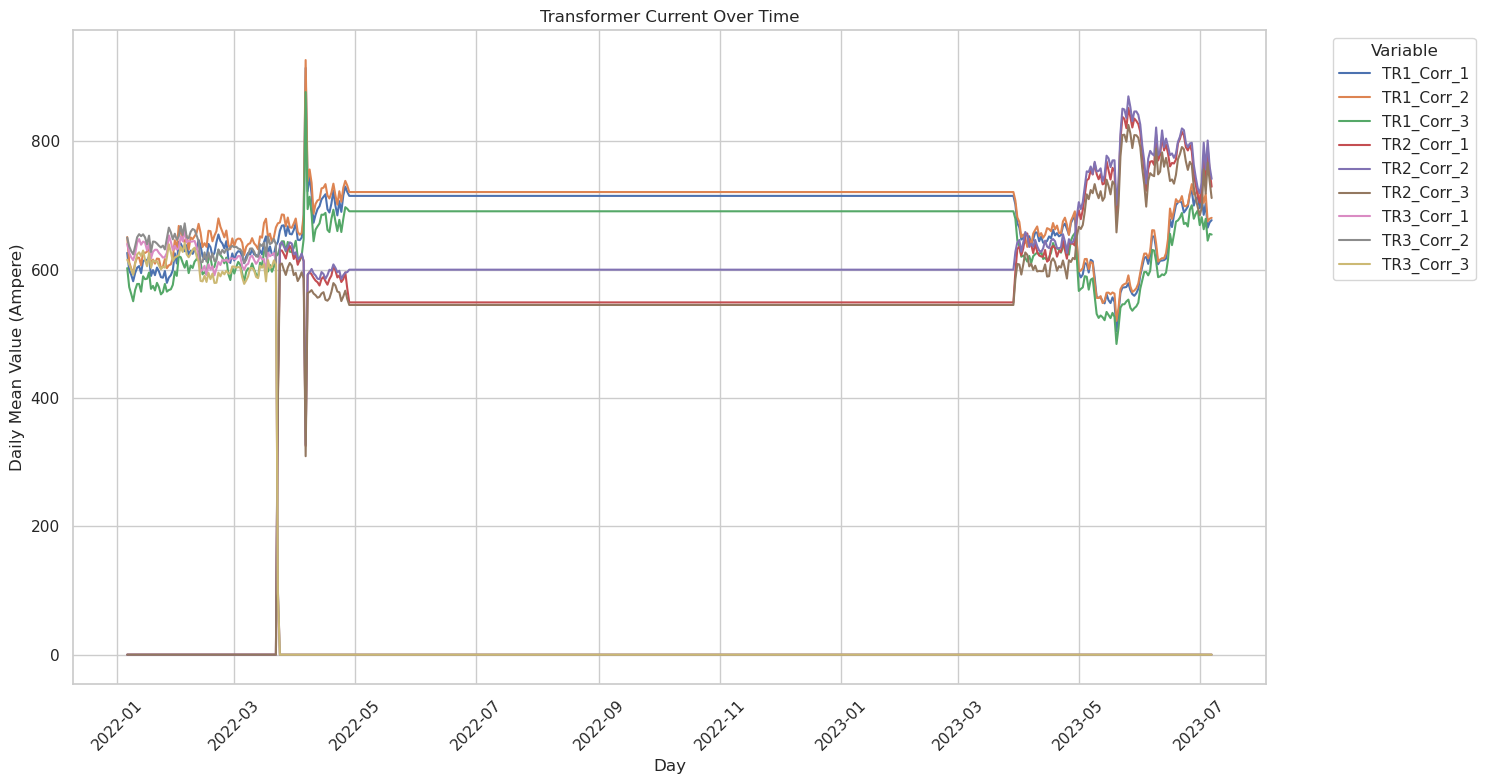

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

variables = data_day_mean['Variable'].unique()

corr123_variables = [var for var in variables if var.startswith('TR') and 'Corr' in var and not var.endswith('N')]
for variable in corr123_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (Ampere)')
plt.title('Transformer Current Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

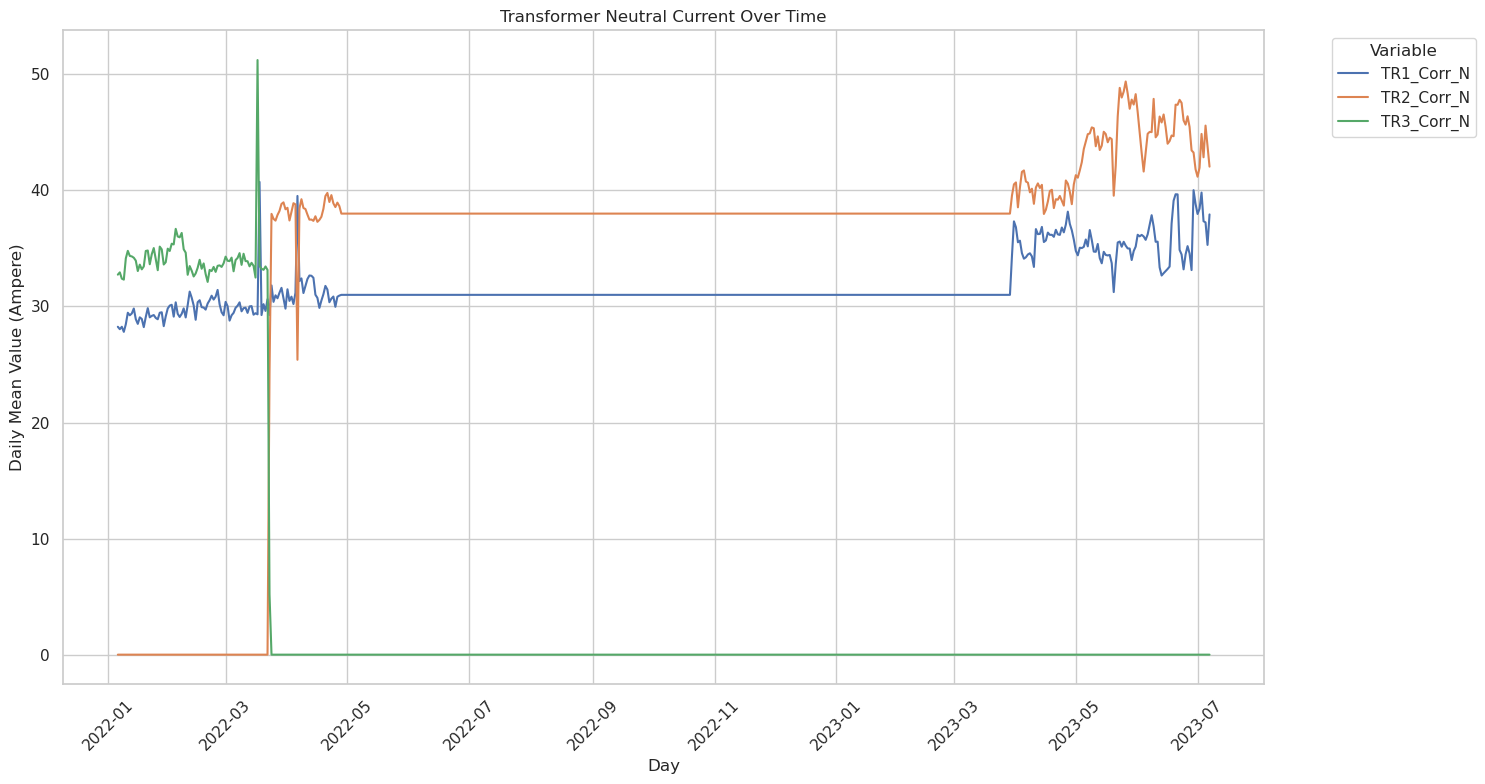

In [15]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

trN_variables = [var for var in variables if var.startswith('TR') and var.endswith('N')]
for variable in trN_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (Ampere)')
plt.title('Transformer Neutral Current Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

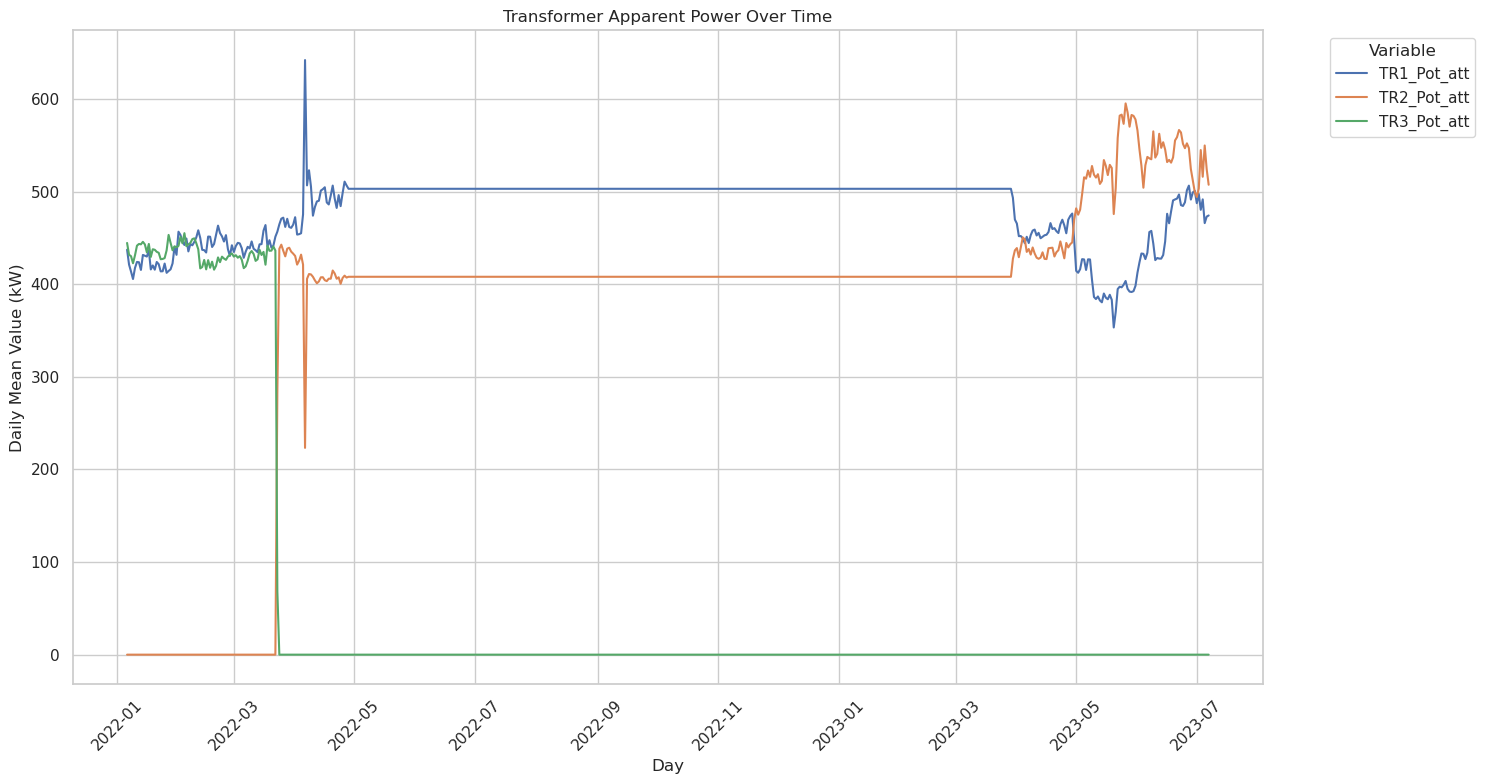

In [16]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

trN_variables = [var for var in variables if 'Pot_att' in var]
for variable in trN_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Transformer Apparent Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

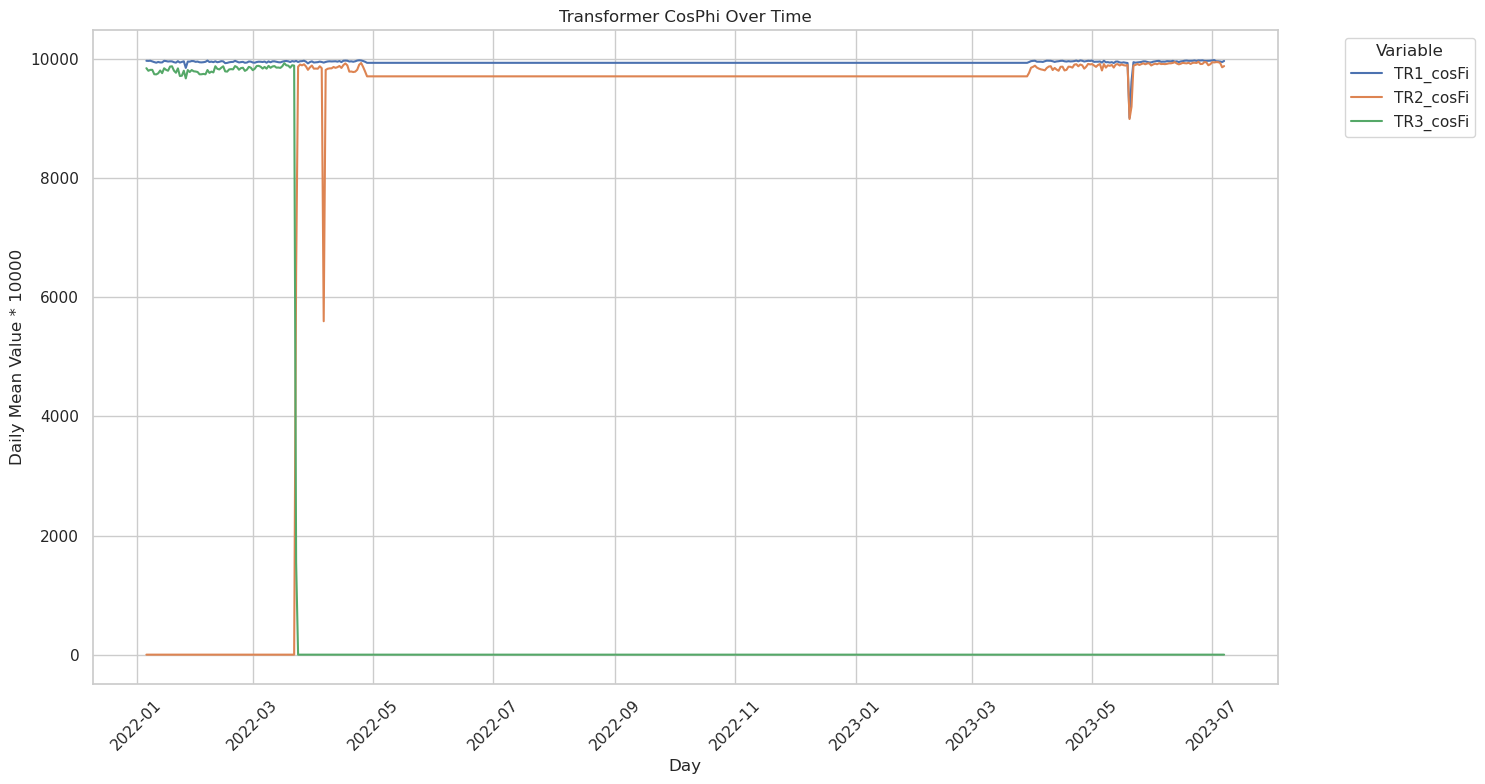

In [17]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

cosfi = [var for var in variables if var.endswith('cosFi')]
for variable in cosfi:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value * 10000')
plt.title('Transformer CosPhi Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

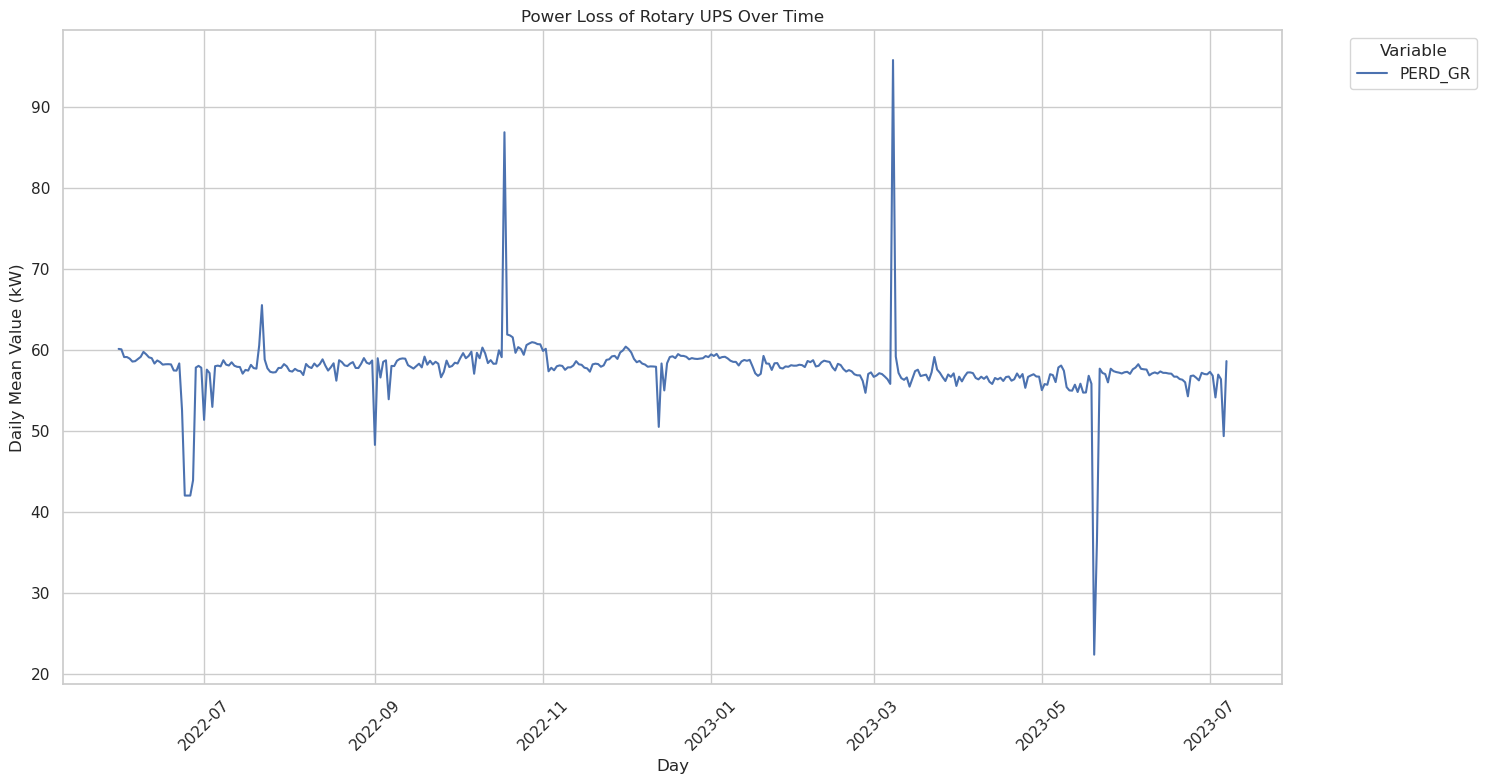

In [18]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

perd_gr = data_day_mean[data_day_mean['Variable'] == 'PERD_GR']
plt.plot(perd_gr['Day'], perd_gr['Value'], label='PERD_GR')

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Power Loss of Rotary UPS Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

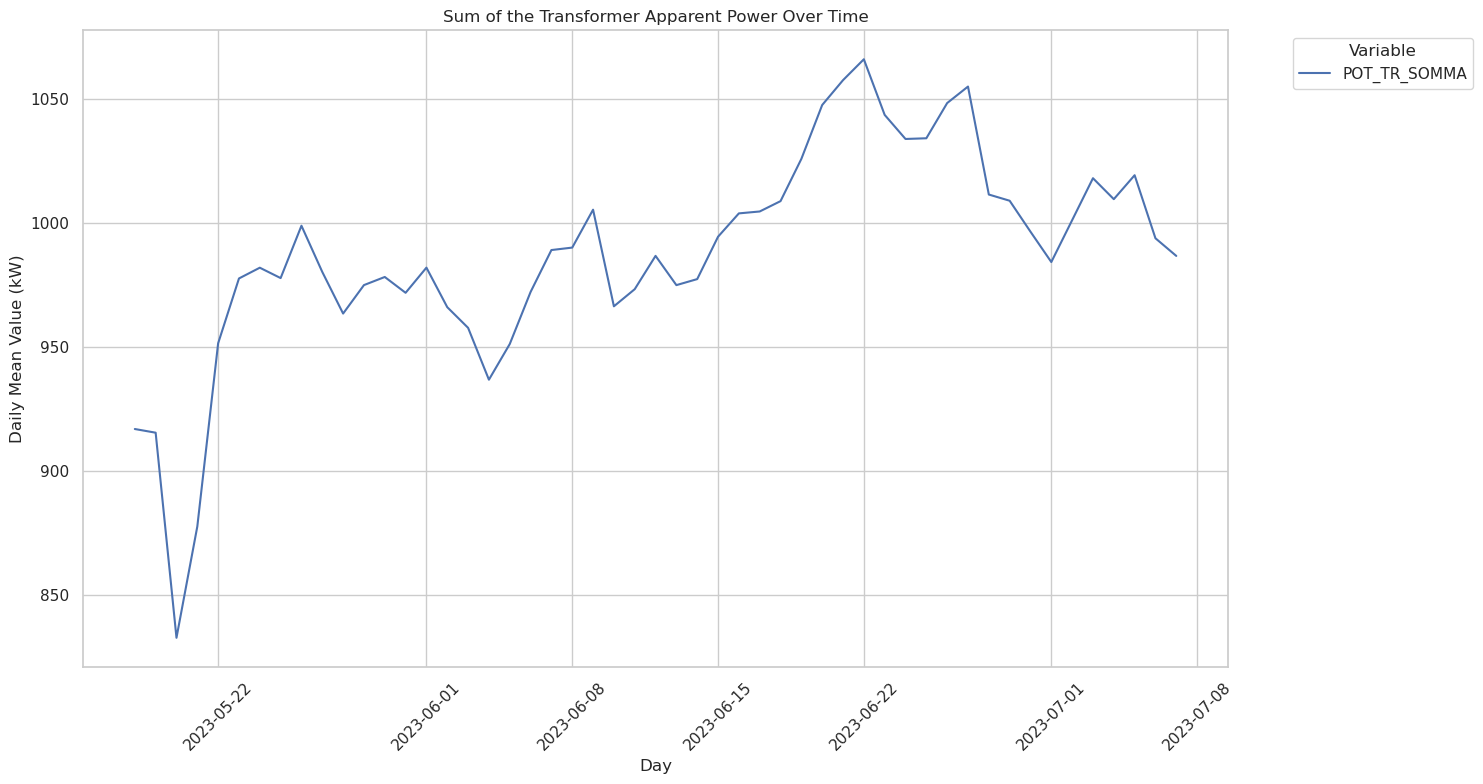

In [19]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

somma = data_day_mean[data_day_mean['Variable'] == 'POT_TR_SOMMA']
plt.plot(somma['Day'], somma['Value'], label='POT_TR_SOMMA')

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Sum of the Transformer Apparent Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Ideally, we would perform cluster analysis identifying groups of variables that behave similarly over time, and it would group the variables in the same way as we did when plotting them.